In [2]:
!pip install numpy matplotlib

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------- ------------------------------- 30.7/165.9 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.4/7.8 MB 8.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/7.8 MB 10.8 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/7.8 MB 12.7 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/7.8 MB 15.5 MB/s eta 0:00:01
   ------------------ --------------------- 3.6/7.8 MB 15.4 MB/s eta 0:00:01
   ---------------------- ----------------- 4.3/7.8 MB 15.3 MB/s eta 0:00:01
   ------------------------- -------------- 5.1/7.8 MB 15.5 MB/s eta 0:00:01
   ---------------------------- ----------- 5.6/7.8 MB 15.0 MB/s eta 0:00:01
   ------------------------------- -------- 6.2/7.8 MB 14.8 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


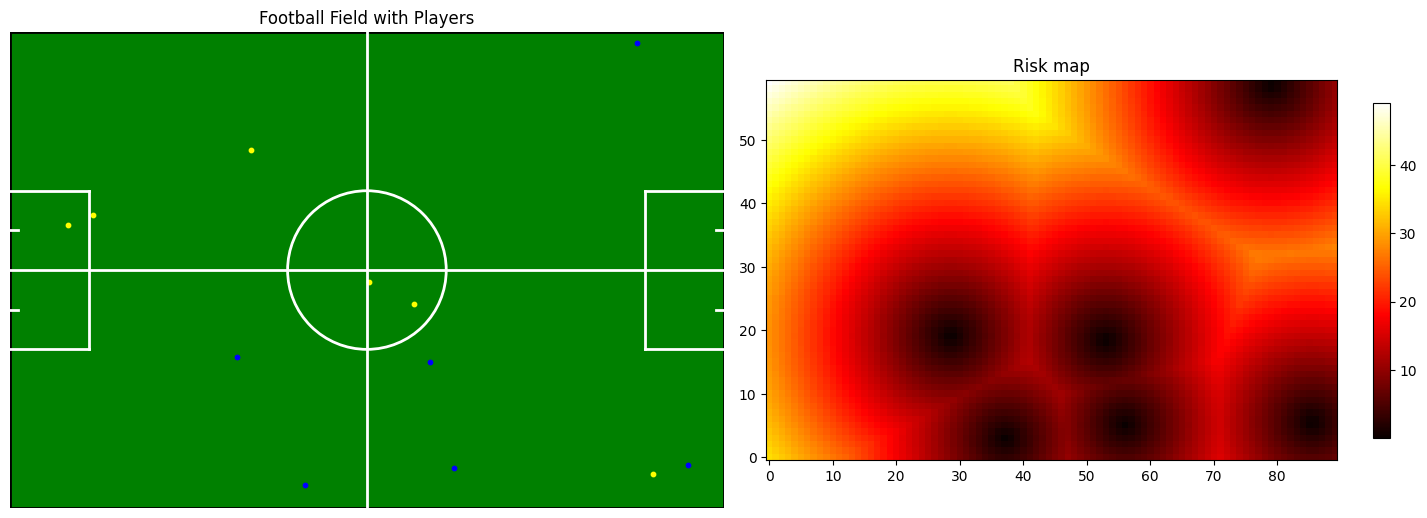

In [78]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Field dimensions
field_length = 90
field_width = 60

# Set the number of players
num_players_team = 6  # 6 players per team
players_x_blue = np.random.uniform(0, field_length, num_players_team)
players_y_blue = np.random.uniform(0, field_width, num_players_team)

players_x_yellow = np.random.uniform(0, field_length, num_players_team)
players_y_yellow = np.random.uniform(0, field_width, num_players_team)

# Plot Football Field with Players #

ax1.add_patch(patches.Rectangle((0, 0), field_length, field_width, edgecolor='black', facecolor='green', lw=2))
center_circle = plt.Circle((field_length / 2, field_width / 2), 10, color='white', fill=False, lw=2)

# Center circle
ax1.add_patch(center_circle)

# Field line
ax1.plot([field_length / 2, field_length / 2], [0, field_width], color='white', lw=2)
ax1.plot([0, field_length], [field_width / 2, field_width / 2], color='white', lw=2)

# Goal boxes
goal_box_width = 1
goal_box_height = 10
ax1.plot([0, goal_box_width], [field_width / 2 + goal_box_height / 2, field_width / 2 + goal_box_height / 2], color='white', lw=2)
ax1.plot([0, goal_box_width], [field_width / 2 - goal_box_height / 2, field_width / 2 - goal_box_height / 2], color='white', lw=2)

ax1.plot([field_length, field_length - goal_box_width], [field_width / 2 + goal_box_height / 2, field_width / 2 + goal_box_height / 2], color='white', lw=2)
ax1.plot([field_length, field_length - goal_box_width], [field_width / 2 - goal_box_height / 2, field_width / 2 - goal_box_height / 2], color='white', lw=2)

# Penalty boxes
penalty_box_width = 10
penalty_box_height = 20
ax1.plot([0, penalty_box_width], [field_width / 2 + penalty_box_height / 2, field_width / 2 + penalty_box_height / 2], color='white', lw=2)
ax1.plot([0, penalty_box_width], [field_width / 2 - penalty_box_height / 2, field_width / 2 - penalty_box_height / 2], color='white', lw=2)
ax1.plot([penalty_box_width, penalty_box_width], [field_width / 2 + penalty_box_height / 2, field_width / 2 - penalty_box_height / 2], color='white', lw=2)

ax1.plot([field_length, field_length - penalty_box_width], [field_width / 2 + penalty_box_height / 2, field_width / 2 + penalty_box_height / 2], color='white', lw=2)
ax1.plot([field_length, field_length - penalty_box_width], [field_width / 2 - penalty_box_height / 2, field_width / 2 - penalty_box_height / 2], color='white', lw=2)
ax1.plot([field_length - penalty_box_width, field_length - penalty_box_width], [field_width / 2 + penalty_box_height / 2, field_width / 2 - penalty_box_height / 2], color='white', lw=2)

ax1.scatter(players_x_blue, players_y_blue, color='blue', label='Team Blue', s=10)
ax1.scatter(players_x_yellow, players_y_yellow, color='yellow', label='Team Yellow', s=10)

# Set limits, labels, and title
ax1.set_xlim(0, field_length)
ax1.set_ylim(0, field_width)
ax1.set_aspect('equal', adjustable='box')
ax1.set_title('Football Field with Players')
ax1.axis('off')

# Plot Risk Map 

risk_maps = np.zeros((players_x_blue.shape[0], field_width, field_length))

for i, (x, y) in enumerate(zip(players_x_blue, players_y_blue)):
    grid_x, grid_y = np.meshgrid(np.arange(field_length), np.arange(field_width))
    risk_maps[i, :, :] = np.sqrt(((grid_x - x) ** 2 + (grid_y - y) ** 2))


risk_map = np.min(risk_maps, axis=0)

rmap = ax2.imshow(risk_map, origin='lower', cmap='hot')
fig.colorbar(rmap, ax=ax2, shrink=0.5)
ax2.set_aspect('equal', adjustable='box')


ax2.set_title('Risk map')

plt.tight_layout()
plt.show()

In [76]:
risk_maps[0].max()

np.float64(76.81133667687602)